In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv("C:\\Users\\rutuj\\OneDrive\\Desktop\\CAS1.music\\music_recommendation_dataset.csv")


In [3]:
df.head()

,user_id,age,gender,genre_preference,music_name,minutes_listened,liked
0,1,29,Male,Country,Shape of You,15,1
1,2,30,Female,Country,Dance Monkey,118,1
2,3,37,Female,Rock,Closer,14,1
3,4,37,Female,Classical,Faded,36,1
4,5,42,Male,EDM,Blinding Lights,29,1


In [4]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create and fit separate encoders
gender_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
music_encoder = LabelEncoder()

df['gender'] = gender_encoder.fit_transform(df['gender'])
df['genre_preference'] = genre_encoder.fit_transform(df['genre_preference'])
df['music_name'] = music_encoder.fit_transform(df['music_name'])



In [5]:
# Define features and target
X = df.drop('liked', axis=1)
y = df['liked']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [8]:
y_pred = model.predict(X_test)


In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.595
[[27 56]
 [25 92]]
              precision    recall  f1-score   support

           0       0.52      0.33      0.40        83
           1       0.62      0.79      0.69       117

    accuracy                           0.59       200
   macro avg       0.57      0.56      0.55       200
weighted avg       0.58      0.59      0.57       200



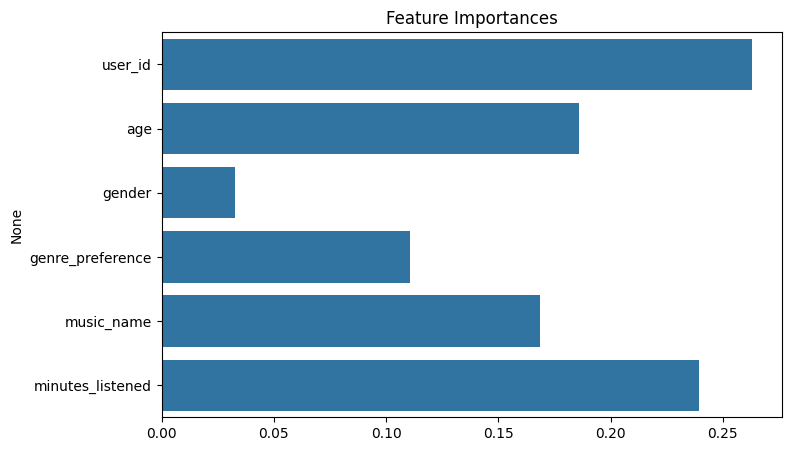

In [10]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()


In [19]:
import pickle

with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)

with open('genre_encoder.pkl', 'wb') as f:
    pickle.dump(genre_encoder, f)

with open('music_encoder.pkl', 'wb') as f:
    pickle.dump(music_encoder, f)
